[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/convnet/blob/master/convnet.ipynb)

In [1]:
!pip install torch


    100% |████████████████████████████████| 519.5MB 21kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x556b5655a000 @  0x7febc4d1d1c4 0x556afd92a0d8 0x556afda13d5d 0x556afd93d77a 0x556afd942462 0x556afd93ab3a 0x556afd94282e 0x556afd93ab3a 0x556afd94282e 0x556afd93ab3a 0x556afd94282e 0x556afd93ab3a 0x556afd942e1f 0x556afd93ab3a 0x556afd94282e 0x556afd93ab3a 0x556afd94282e 0x556afd942462 0x556afd942462 0x556afd93ab3a 0x556afd942e1f 0x556afd942462 0x556afd93ab3a 0x556afd942e1f 0x556afd93ab3a 0x556afd942e1f 0x556afd93ab3a 0x556afd94282e 0x556afd93ab3a 0x556afd96b50f 0x556afd966202


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
import matplotlib.pyplot as plt

In [0]:
class net(nn.Module):
  #in init only define trainable parameters
  def __init__(self):
    super(net,self).__init__()    
    self.conv1=nn.Conv2d(1,16,5) #filter1
    self.conv2=nn.Conv2d(16,32,3)#filter2
    self.conv3=nn.Conv2d(32,32,1)#filter3
    self.fc1=nn.Linear(32*23*23,2500) #linear layer input and output
    self.fc2=nn.Linear(2500,1000)
    self.fc3=nn.Linear(1000,100)
    self.fc4=nn.Linear(100,10)
    
  def forward(self,x):
    x=f.max_pool2d(f.relu(self.conv1(x)),(2,2),stride=1)
    x=f.max_pool2d(f.relu(self.conv2(x)),(2,2),stride=1)
    x=f.max_pool2d(f.relu(self.conv3(x)),(2,2),stride=1)
    x=x.view(-1,self.num_of_features(x))
   
    x=f.relu(self.fc1(x))
    x=f.relu(self.fc2(x))
    x=f.relu(self.fc3(x))
    x=self.fc4(x)
    return x
  
  def num_of_features(self,x):
    size=x.size()[1:]     
    numfeatures=1
    for s in size:
      numfeatures*=s
    return numfeatures
  
NET=net()
Loss=[]
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(NET.parameters(),lr=0.01,momentum=0.9)
epoch=400
for i in range(epoch):
     input=torch.rand(10,1,32,32) #define input of the format as filter
     target=torch.randint(1, 10, (10,)).long()
     out=NET(input)
     loss=criterion(out,target)
     Loss.append(loss/10)
     loss.backward()
     optimizer.step()



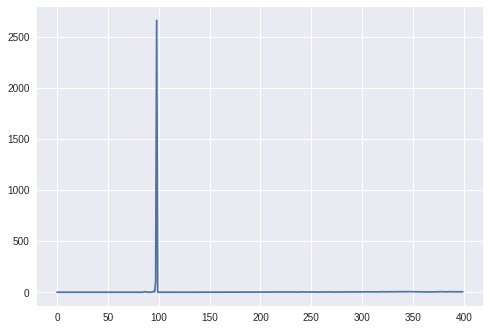

In [24]:
plt.figure()
plt.plot(Loss)
plt.show()

In [25]:
input=torch.rand(1,1,32,32) #define input of the format as filter
target=torch.randint(1, 10, (1,)).long()
output=NET(input)
print(output,target)

(tensor([[-61.7816,  52.5570,  33.3751,  -1.1099, -37.3549, -53.2038,  49.0301,
          -7.1602,  39.1348, -13.7355]], grad_fn=<ThAddmmBackward>), tensor([3]))
